In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Regression on Airbnb Price

In [86]:
airbnb_data = pd.read_csv("cleaned_data/airbnb_model_data_clean.csv")

In [87]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233369 entries, 0 to 233368
Data columns (total 50 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   last_scraped                      233369 non-null  object 
 1   id                                233369 non-null  int64  
 2   host_id                           233369 non-null  int64  
 3   host_is_superhost                 233369 non-null  int64  
 4   host_listings_count               233369 non-null  float64
 5   zipcode                           233369 non-null  float64
 6   latitude                          233369 non-null  float64
 7   longitude                         233369 non-null  float64
 8   accommodates                      233369 non-null  int64  
 9   bathrooms                         233369 non-null  float64
 10  beds                              233369 non-null  float64
 11  price                             233369 non-null  f

## Prepare Data for Modeling

In [6]:
# Create summary function to quickly show statsmodel summary output.

def linreg_summary(X_train, y_train):
    X_int = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_int).fit()
    return model.summary()

In [12]:
# set up variables and drop non numerical columns
y = airbnb_data['price']
X = airbnb_data.drop(['last_scraped', 'name','host_id','price'], axis=1)

In [13]:
# perform train-test split using a test size of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

## Run Baseline Model

In [14]:
# perform linear regression in scikitlearn
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [15]:
metrics.r2_score(y_train, y_hat_train)

0.1912426950647338

In [16]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     1026.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:26:21   Log-Likelihood:            -1.4000e+06
No. Observations:              186695   AIC:                         2.800e+06
Df Residuals:                  186651   BIC:                         2.801e+06
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1.565e+04   4820.928      3.246      0.001    6200.164    2.51e+04
host_is_superhost                    5.9400      2.312      2.569      0.010       1.409      10.471
host_listings_count                  0.3260      0.003     95.675      0.000       0.319       0.333
zipcode                              0.1109      0.040      2.763      0.006       0.032       0.190
latitude                          -135.9610     53.639     -2.535      0.011    -241.093     -30.829
longitude                          174.7188     53.635      3.258      0.001      69.595     279.843
accommodates                        -0.5616      0.598     -0.939      0.348      -1.733       0.610
bathrooms                           90.5652      1.468     61.711      0.000      87.689      93.442
beds                                24.4834      0.611     40.048      0.000      23.285      25.682
guests_included                    -10.2663      0.443    -23.196      0.000     -11.134      -9.399
minimum_nights                      -0.8406      0.088     -9.530      0.000      -1.013      -0.668
maximum_nights                    3.926e-08    9.1e-08      0.431      0.666   -1.39e-07    2.18e-07
availability_30                      2.2243      0.311      7.152      0.000       1.615       2.834
availability_60                      0.2827      0.325      0.871      0.384      -0.354       0.919
availability_90                     -0.7223      0.156     -4.628      0.000      -1.028      -0.416
number_of_reviews                   -0.1207      0.018     -6.812      0.000      -0.155      -0.086
review_scores_rating                 0.3669      0.370      0.992      0.321      -0.358       1.092
review_scores_accuracy               1.3628      2.788      0.489      0.625      -4.102       6.827
review_scores_cleanliness           17.8271      2.291      7.781      0.000      13.337      22.317
review_scores_checkin                4.4011      2.952      1.491      0.136      -1.385      10.187
review_scores_communication         -9.5726      3.113     -3.075      0.002     -15.675      -3.470
review_scores_location              25.0072      2.012     12.427      0.000      21.063      28.951
review_scores_value                 -8.7845      2.404     -3.654      0.000     -13.496      -4.073
instant_bookable                    -2.2060      2.242     -0.984      0.325      -6.601       2.189
reviews_per_month                   -7.3077      0.627    -11.647      0.000      -8.537      -6.078
property_type_Condominium          -23.7001      4.633     -5.116      0.000     -32.780     -14.620
property_type_House                -12.0815      3.531     -3.422      0.001     -19.002      -5.161
property_type_Other                -39.9006      3.28

In [17]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 437.0486021911183
RMSE Test: 453.12477070685514


## Run Model Using Only most Correlated Features

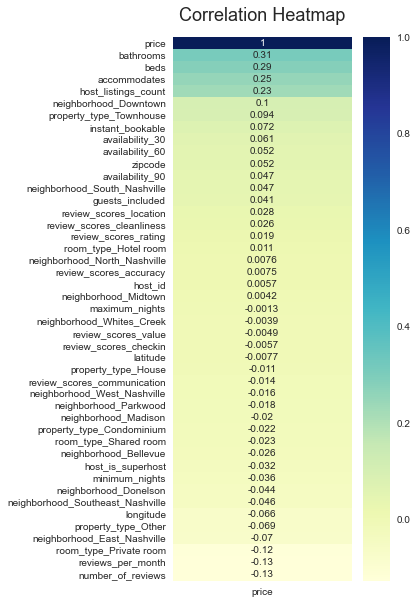

In [18]:
plt.figure(figsize=(4, 10))
#mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(airbnb_data.corr()[['price']].sort_values(by='price', ascending=False),
                       cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [77]:
X_train = X_train[['bathrooms','beds','accommodates','host_listings_count']]
X_test = X_test[['bathrooms','beds','accommodates','host_listings_count']]

KeyError: ('bathrooms', 'beds', 'accommodates', 'host_listings_count')

In [21]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [22]:
metrics.r2_score(y_train, y_hat_train)

0.17472146046915682

In [23]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     9881.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:31:38   Log-Likelihood:            -1.4019e+06
No. Observations:              186695   AIC:                         2.804e+06
Df Residuals:                  186690   BIC:                         2.804e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -20.2116      2.152     -9.391      0.000     -24.430     -15.993
bathrooms              97.4474      1.415     68.859      0.000      94.674     100.221
beds                   24.2758      0.609     39.855      0.000      23.082      25.470
accommodates           -2.6103      0.521     -5.015      0.000      -3.631      -1.590
host_listings_count     0.3686      0.003    124.361      0.000       0.363       0.374
==============================================================================
Omnibus:                   434008.518   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5568174253.748
Skew:                          22.938   Prob(JB):                         0.00
Kurtosis:                     847.805   Cond. No.                         780.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 441.49003286735285
RMSE Test: 457.47363499069075


## Choose Model Features Using Stepwise Selection

In [ ]:
y = airbnb_data['price']
X = airbnb_data.drop(['last_scraped', 'name','host_id','price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

In [50]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [51]:
new_x_cols = stepwise_selection(X_train, y_train, verbose=False)
print('resulting features:')
print(new_x_cols)

<ipython-input-50-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['beds', 'neighborhood_North_Nashville', 'minimum_nights', 'neighborhood_West_Nashville', 'review_scores_cleanliness']


In [53]:
X_train = X_train[new_x_cols]
X_test = X_test[new_x_cols]

In [54]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [56]:
print('R2 Score:',metrics.r2_score(y_train, y_hat_train))
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 1813.2696517546747
RMSE Test: 34952.7932531485


In [57]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1609.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           2.20e-26
Time:                        10:45:26   Log-Likelihood:                -240.89
No. Observations:                  27   AIC:                             493.8
Df Residuals:                      21   BIC:                             501.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -9.763e+05   2.98e+05     -3.272      0.004    -1.6e+06   -3.56e+05
beds                          6.411e+04   5369.569     11.939      0.000    5.29e+04    7.53e+04
neighborhood_North_Nashville  2.574e+05   9.69e+04      2.656      0.015    5.58e+04    4.59e+05
minimum_nights                4955.6450    429.714     11.532      0.000    4062.005    5849.285
neighborhood_West_Nashville   4.838e+05   9.38e+04      5.159      0.000    2.89e+05    6.79e+05
review_scores_cleanliness     1.061e+05   2.96e+04      3.581      0.002    4.45e+04    1.68e+05
==============================================================================
Omnibus:                        3.433   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                1.847
Skew:                          -0.362   Prob(JB):                        0.397
Kurtosis:                       1.942   Cond. No.                     8.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression on Average Home Value

In [88]:
regression_df = pd.read_csv("cleaned_data/model_data_clean.csv", index_col=0)

In [89]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 2015-06-01 to 2021-02-01
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39 non-null     float64
 1   host_id                           39 non-null     float64
 2   host_listings_count               39 non-null     float64
 3   zipcode                           39 non-null     float64
 4   latitude                          39 non-null     float64
 5   longitude                         39 non-null     float64
 6   accommodates                      39 non-null     float64
 7   bathrooms                         39 non-null     float64
 8   beds                              39 non-null     float64
 9   price                             39 non-null     float64
 10  guests_included                   39 non-null     float64
 11  minimum_nights                    39 non-null     float64
 12

In [30]:
regression_df.head()

,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,inventory,avg_home_value
2015-06-01,1.847859e+07,0.190083,2.355372,37202.099174,36.161913,-86.768430,4.223140,1.450413,2.033058,163.115702,...,0.008264,0.082645,0.049587,0.008264,0.123967,0.033058,0.066116,0.024793,121,248302.80
2015-07-01,1.588542e+07,0.176471,10.465015,37202.203096,36.157222,-86.767316,4.607430,1.500310,2.308978,202.349226,...,0.007430,0.106502,0.030341,0.003715,0.128793,0.039009,0.072446,0.005573,1615,250573.92
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,252813.76
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,255660.52
2015-10-01,1.857827e+07,0.205687,11.842180,37201.418483,36.156564,-86.767390,4.795735,1.528910,2.406161,200.524171,...,0.009953,0.111848,0.036019,0.004739,0.123223,0.039336,0.071090,0.010900,2110,258221.84


In [31]:
regression_df.tail()

,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,inventory,avg_home_value
2020-10-01,1.089430e+08,0.583485,44.070025,37202.054170,36.161081,-86.769555,6.279273,1.912799,3.715442,212.609249,...,0.008423,0.059785,0.111148,0.006276,0.156400,0.026259,0.053509,0.008092,6055,375489.12
2020-11-01,1.117253e+08,0.576787,44.364508,37202.339950,36.160847,-86.770116,6.231287,1.907149,3.692683,211.482086,...,0.007906,0.058537,0.115896,0.005551,0.156770,0.026913,0.054500,0.008242,5945,378282.36
2020-12-01,1.180080e+08,0.568016,45.724200,37202.158459,36.160308,-86.769276,6.198440,1.906143,3.645701,212.335529,...,0.008451,0.057045,0.110515,0.007151,0.154721,0.030879,0.054282,0.007639,6153,381649.48
2021-01-01,1.191460e+08,0.572153,47.797448,37201.979548,36.160198,-86.769105,6.201080,1.907723,3.649215,225.319863,...,0.008835,0.056283,0.111584,0.006872,0.153632,0.031250,0.053992,0.007690,6112,384369.80
2021-02-01,1.220661e+08,0.572103,101.710612,37202.113444,36.160366,-86.768799,6.230794,1.921143,3.665365,233.017741,...,0.007975,0.055176,0.112956,0.008301,0.151204,0.033040,0.055013,0.007812,6144,387076.52


In [32]:
regression_df.dropna(inplace=True)

In [33]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 2015-06-01 to 2021-02-01
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_id                           39 non-null     float64
 1   host_is_superhost                 39 non-null     float64
 2   host_listings_count               39 non-null     float64
 3   zipcode                           39 non-null     float64
 4   latitude                          39 non-null     float64
 5   longitude                         39 non-null     float64
 6   accommodates                      39 non-null     float64
 7   bathrooms                         39 non-null     float64
 8   beds                              39 non-null     float64
 9   price                             39 non-null     float64
 10  guests_included                   39 non-null     float64
 11  minimum_nights                    39 non-null     float64
 12

## Run Baseline Model

In [34]:
y = regression_df['avg_home_value']
X = regression_df.drop(['host_id','avg_home_value'], axis=1)

In [38]:
# y = regression_df['total_average']
# X = regression_df['inventory']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

In [36]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [37]:
metrics.r2_score(y_train, y_hat_train)

1.0

In [38]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 7.552612098547564e-07
RMSE Test: 46573.43378306996


In [39]:
linreg_summary(X_train,y_train)

C:\Users\saman\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\saman\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\saman\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\saman\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                nan
Time:                        10:36:02   Log-Likelihood:                 309.86
No. Observations:                  27   AIC:                            -565.7
Df Residuals:                       0   BIC:                            -530.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              594.1693        inf          0        nan         nan         nan
host_is_superhost                -6.908e+04        inf         -0        nan         nan         nan
host_listings_count                  2.1583        inf          0        nan         nan         nan
zipcode                            -90.8057        inf         -0        nan         nan         nan
latitude                          1.651e+04        inf          0        nan         nan         nan
longitude                        -5.747e+04        inf         -0        nan         nan         nan
accommodates                     -7.029e+04        inf         -0        nan         nan         nan
bathrooms                         1.771e+05        inf          0        nan         nan         nan
beds                              5.375e+04        inf          0        nan         nan         nan
price                              -52.1863        inf         -0        nan         nan         nan
guests_included                   3.643e+04        inf          0        nan         nan         nan
minimum_nights                    1384.1800        inf          0        nan         nan         nan
maximum_nights                      -0.0050        inf         -0        nan         nan         nan
availability_30                   -398.1195        inf         -0        nan         nan         nan
availability_60                    638.3089        inf          0        nan         nan         nan
availability_90                   -205.6221        inf         -0        nan         nan         nan
number_of_reviews                 1266.7167        inf          0        nan         nan         nan
review_scores_rating             -1.773e+04        inf         -0        nan         nan         nan
review_scores_accuracy            1.138e+05        inf          0        nan         nan         nan
review_scores_cleanliness        -1.078e+05        inf         -0        nan         nan         nan
review_scores_checkin            -4.323e+04        inf         -0        nan         nan         nan
review_scores_communication      -1.354e+05        inf         -0        nan         nan         nan
review_scores_location             4.73e+04        inf          0        nan         nan         nan
review_scores_value               9.308e+04        inf          0        nan         nan         nan
instant_bookable                  2.097e+04        inf          0        nan         nan         nan
reviews_per_month                 -104.2695        inf         -0        nan         nan         nan
property_type_Condominium        -1.902e+05        inf         -0        nan         nan         nan
property_type_House               3.961e+04        in

Using this many features has severely overfit our data. We have more variables than datapoints.

## Run Model Using Only Most Correlated Features

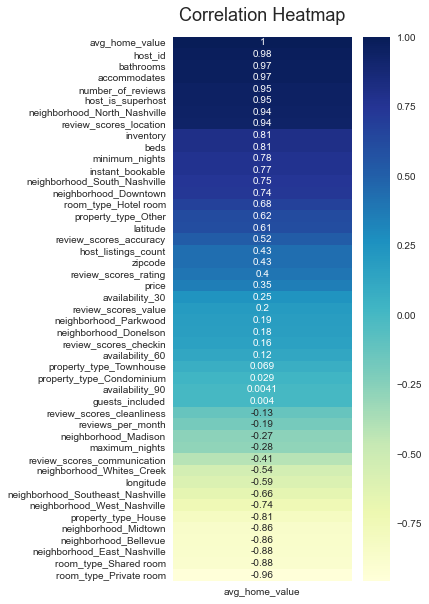

In [40]:
plt.figure(figsize=(4, 10))
#mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(regression_df.corr()[['avg_home_value']].sort_values(by='avg_home_value', ascending=False),
                       cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [42]:
X_train = X_train[['bathrooms','accommodates','number_of_reviews',
                   'host_is_superhost','neighborhood_North_Nashville','review_scores_location']]
X_test = X_test[['bathrooms','accommodates','number_of_reviews',
                   'host_is_superhost','neighborhood_North_Nashville','review_scores_location']]

In [44]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

0.9923220933304913

In [46]:
print('R2 Score:',metrics.r2_score(y_train, y_hat_train))
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 3113.898010682231
RMSE Test: 4675.529064576785


In [47]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     430.8
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           4.63e-20
Time:                        10:41:47   Log-Likelihood:                -255.49
No. Observations:                  27   AIC:                             525.0
Df Residuals:                      20   BIC:                             534.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.195e+05   4.92e+05     -0.243      0.811   -1.15e+06    9.06e+05
bathrooms                     1.566e+05   2.94e+04      5.321      0.000    9.52e+04    2.18e+05
accommodates                  2.338e+04    1.2e+04      1.944      0.066   -1708.199    4.85e+04
number_of_reviews              114.4395    527.309      0.217      0.830    -985.508    1214.387
host_is_superhost            -1.333e+05   5.94e+04     -2.243      0.036   -2.57e+05   -9332.430
neighborhood_North_Nashville   9.35e+05   1.26e+05      7.431      0.000    6.73e+05     1.2e+06
review_scores_location        2058.3262    5.2e+04      0.040      0.969   -1.07e+05    1.11e+05
==============================================================================
Omnibus:                        2.627   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                1.395
Skew:                          -0.213   Prob(JB):                        0.498
Kurtosis:                       1.971   Cond. No.                     3.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Choose Model Features Using Stepwise Selection

In [49]:
y = regression_df['avg_home_value']
X = regression_df.drop(['host_id','avg_home_value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

In [50]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [51]:
new_x_cols = stepwise_selection(X_train, y_train, verbose=False)
print('resulting features:')
print(new_x_cols)

<ipython-input-50-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['beds', 'neighborhood_North_Nashville', 'minimum_nights', 'neighborhood_West_Nashville', 'review_scores_cleanliness']


In [53]:
X_train = X_train[new_x_cols]
X_test = X_test[new_x_cols]

In [54]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [55]:
metrics.r2_score(y_train, y_hat_train)

0.9973964924200883

In [56]:
print('R2 Score:',metrics.r2_score(y_train, y_hat_train))
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 1813.2696517546747
RMSE Test: 34952.7932531485


In [57]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1609.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           2.20e-26
Time:                        10:45:26   Log-Likelihood:                -240.89
No. Observations:                  27   AIC:                             493.8
Df Residuals:                      21   BIC:                             501.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -9.763e+05   2.98e+05     -3.272      0.004    -1.6e+06   -3.56e+05
beds                          6.411e+04   5369.569     11.939      0.000    5.29e+04    7.53e+04
neighborhood_North_Nashville  2.574e+05   9.69e+04      2.656      0.015    5.58e+04    4.59e+05
minimum_nights                4955.6450    429.714     11.532      0.000    4062.005    5849.285
neighborhood_West_Nashville   4.838e+05   9.38e+04      5.159      0.000    2.89e+05    6.79e+05
review_scores_cleanliness     1.061e+05   2.96e+04      3.581      0.002    4.45e+04    1.68e+05
==============================================================================
Omnibus:                        3.433   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                1.847
Skew:                          -0.362   Prob(JB):                        0.397
Kurtosis:                       1.942   Cond. No.                     8.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Run Simple Regression Model Using Airbnb Inventory

In [78]:
y = regression_df['avg_home_value']
X = regression_df[['inventory']]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

In [63]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [64]:
print('R2 Score:',metrics.r2_score(y_train, y_hat_train))

print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

R2 Score: 0.6878074586696343
RMSE Train: 19856.112795072855
RMSE Test: 17263.904799536405


In [65]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     55.08
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           8.98e-08
Time:                        10:49:00   Log-Likelihood:                -305.51
No. Observations:                  27   AIC:                             615.0
Df Residuals:                      25   BIC:                             617.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.405e+05   1.37e+04     17.596      0.000    2.12e+05    2.69e+05
inventory     16.8704      2.273      7.422      0.000      12.189      21.552
==============================================================================
Omnibus:                        5.832   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.301
Skew:                           1.074   Prob(JB):                       0.0706
Kurtosis:                       2.692   Cond. No.                     2.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

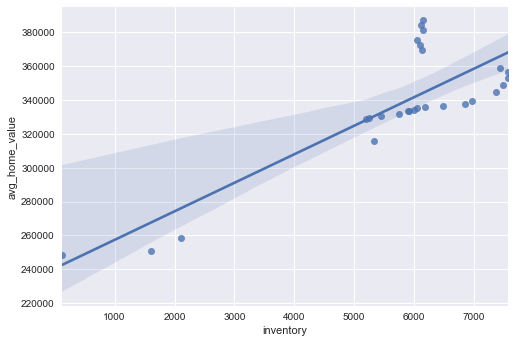

In [67]:
sns.regplot(X_train,y_train)

## Explore Multicollinearity, then perform Stepwise Selection

In [83]:
X = regression_df[['bathrooms','accommodates','number_of_reviews',
                   'host_is_superhost','neighborhood_North_Nashville','review_scores_location']]

In [84]:
#X = regression_df.drop(['host_id','avg_home_value'], axis=1)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('bathrooms', 2982.5297386789885),
 ('accommodates', 8132.3915861495),
 ('number_of_reviews', 954.1563195524938),
 ('host_is_superhost', 1707.4166223288269),
 ('neighborhood_North_Nashville', 256.64014656198816),
 ('review_scores_location', 2008.8174770344501)]

In [85]:
vif_scores = list(zip(X.columns, vif))
multi_co_cols = [x for x,vif in vif_scores if vif > 10]
multi_co_cols

['bathrooms',
 'accommodates',
 'number_of_reviews',
 'host_is_superhost',
 'neighborhood_North_Nashville',
 'review_scores_location']

# STOP HERE

In [36]:
import statsmodels.formula.api as smf
simple_reg_model = smf.ols(formula='total_average ~ inventory', data=regression_df).fit()

In [37]:
print(simple_reg_model.params)
display(simple_reg_model.conf_int())
# null hypothesis 
print('p-values: ')
print(simple_reg_model.pvalues)
print('r-squared: '+ str(simple_reg_model.rsquared))

Intercept    243935.058927
inventory        16.056183
dtype: float64


,0,1
Intercept,219720.485007,268149.632848
inventory,12.150981,19.961384


p-values: 
Intercept    9.886676e-22
inventory    5.191057e-10
dtype: float64
r-squared: 0.6522554516824053


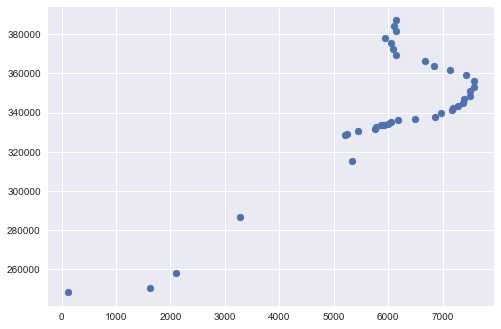

In [44]:
plt.scatter(X,y)

In [28]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [29]:
new_x_cols = stepwise_selection(X_train, y_train, verbose=False)
print('resulting features:')
print(new_x_cols)

<ipython-input-28-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['beds']


In [68]:
df_pairs=regression_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))

# set index to pairs
df_pairs.set_index(['pairs'], inplace = True)

#d rop level columns
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_pairs.columns = ['cc']

# drop duplicates. 
df_pairs.drop_duplicates(inplace=True)

In [69]:
df_pairs[(df_pairs.cc>.75) & (df_pairs.cc <1)]

,cc
pairs,
"(host_is_superhost, number_of_reviews)",0.988556
"(room_type_Private room, accommodates)",0.987133
"(property_type_Townhouse, property_type_Condominium)",0.984592
"(room_type_Private room, host_is_superhost)",0.981423
"(room_type_Private room, number_of_reviews)",0.981331
...,...
"(neighborhood_West_Nashville, host_is_superhost)",0.753827
"(review_scores_rating, review_scores_value)",0.753225
"(inventory, bathrooms)",0.751174


In [34]:
#X = regression_df.drop(['total_average'], axis=1)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('zipcode', 715259843.1212648),
 ('latitude', 5457073078.292448),
 ('longitude', 6564502079.45954),
 ('accommodates', 22771.63979053534),
 ('bathrooms', 10842.413959299245),
 ('bedrooms', 5500.522294833365),
 ('beds', 8880.791590580611),
 ('price', 985.9804349733819),
 ('guests_included', 2423.499957960968),
 ('minimum_nights', 68.88862950081703),
 ('maximum_nights', 2.143976185425021),
 ('number_of_reviews', 1559.0167982996509),
 ('inventory', 554.9645190228075)]

## total_average vs. number of reviews

In [45]:
y = regression_df['total_average']
X = regression_df['number_of_reviews']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

In [50]:
simple_reg_model = smf.ols(formula='total_average ~ number_of_reviews', data=regression_df).fit()

In [51]:
print(simple_reg_model.params)
display(simple_reg_model.conf_int())
# null hypothesis 


Intercept            206414.964047
number_of_reviews      2914.870325
dtype: float64


,0,1
Intercept,191325.628949,221504.299144
number_of_reviews,2593.997965,3235.742685


In [52]:
print('p-values: ')
print(simple_reg_model.pvalues)
print('r-squared: '+ str(simple_reg_model.rsquared))

p-values: 
Intercept            2.380020e-26
number_of_reviews    3.246172e-20
dtype: float64
r-squared: 0.9015417083368342


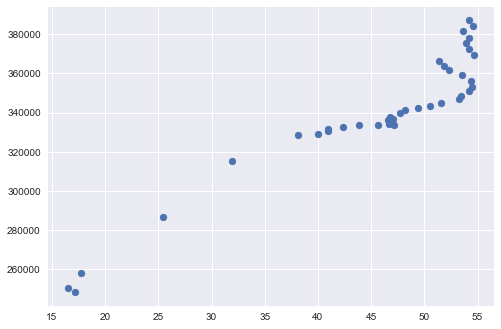

In [53]:
plt.scatter(X,y)

In [54]:
simple_reg_model = smf.ols(formula='total_average ~ accommodates', data=regression_df).fit()

In [55]:
print(simple_reg_model.params)
display(simple_reg_model.conf_int())
# null hypothesis 


Intercept      -56454.606231
accommodates    67922.084958
dtype: float64


,0,1
Intercept,-89575.110571,-23334.101891
accommodates,62265.675887,73578.494030


In [56]:
print('p-values: ')
print(simple_reg_model.pvalues)
print('r-squared: '+ str(simple_reg_model.rsquared))

p-values: 
Intercept       1.401787e-03
accommodates    2.314294e-24
dtype: float64
r-squared: 0.9411739313529919


### Correlation Heatmap

In [65]:
np.triu(np.ones_like(regression_df.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

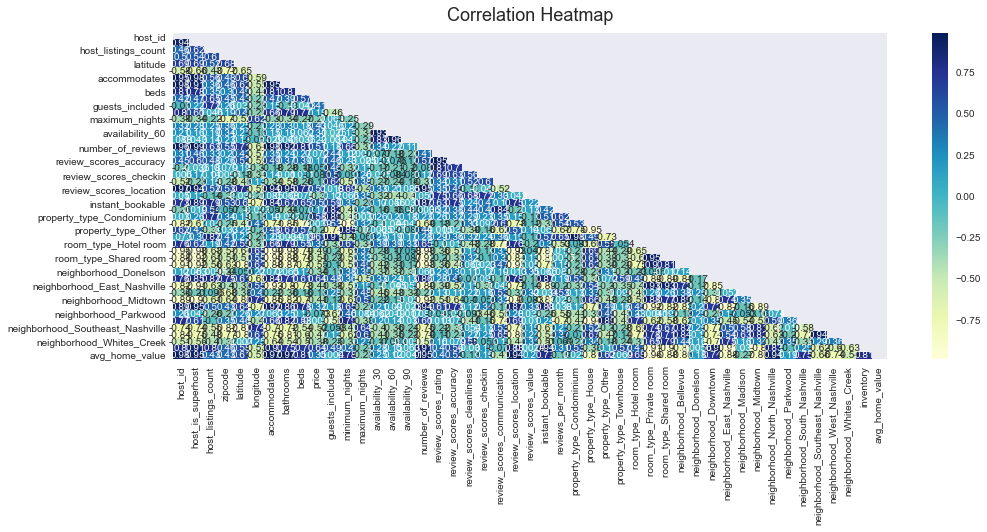

In [70]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(regression_df.corr(), mask=mask, cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [ ]:
regression_df.corr()[['total_average']].sort_values(by='total_average', ascending=False)

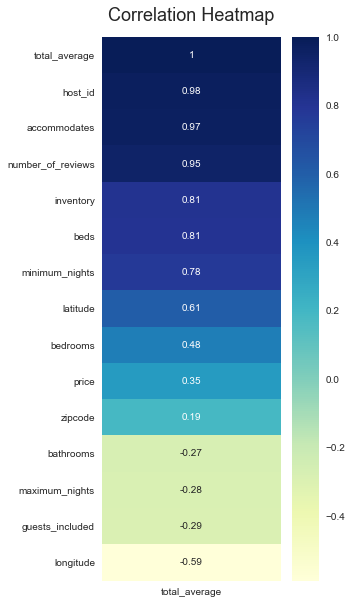

In [72]:
plt.figure(figsize=(4, 10))
#mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(regression_df.corr()[['total_average']].sort_values(by='total_average', ascending=False),
                       cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### Simple Linear Regression

#### Pairplots

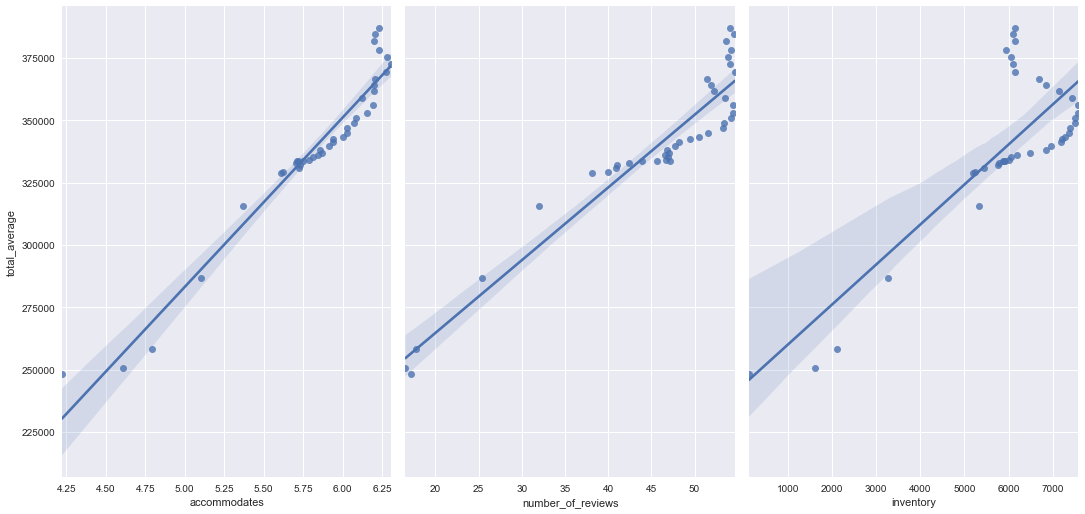

In [76]:
sns.pairplot(regression_df, x_vars=['accommodates','number_of_reviews','inventory'], 
             y_vars='total_average', height=7, aspect=0.7, kind='reg');

The relationship does not appear to be linear. There are also very limited number of datapoints under $300k.


#### Inventory

In [71]:
def run_ols_model(outcome, predictors):
    formula = outcome+'~'+predictors
    model = ols(formula=formula, data=regression_df).fit()
    return model.summary()

In [72]:
outcome = 'avg_home_value'
predictors = 'inventory'
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     69.68
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           4.94e-10
Time:                        10:51:25   Log-Likelihood:                -439.58
No. Observations:                  39   AIC:                             883.2
Df Residuals:                      37   BIC:                             886.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.438e+05   1.19e+04     20.424      0.000     2.2e+05    2.68e+05
inventory     16.0744      1.926      8.348      0.000      12.173      19.976
==============================================================================
Omnibus:                        8.833   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.822
Skew:                           1.164   Prob(JB):                       0.0121
Kurtosis:                       3.072   Cond. No.                     2.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Number of Reviews

In [73]:
outcome = 'avg_home_value'
predictors = 'number_of_reviews'
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     336.0
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           3.72e-20
Time:                        10:51:27   Log-Likelihood:                -415.17
No. Observations:                  39   AIC:                             834.3
Df Residuals:                      37   BIC:                             837.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.065e+05   7474.892     27.621      0.000    1.91e+05    2.22e+05
number_of_reviews  2913.4966    158.940     18.331      0.000    2591.454    3235.539
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.687
Skew:                           0.499   Prob(JB):                        0.261
Kurtosis:                       2.190   Cond. No.                         211.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Accommodates

In [74]:
outcome = 'avg_home_value'
predictors = 'accommodates'
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     590.1
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           2.45e-24
Time:                        10:51:28   Log-Likelihood:                -405.04
No. Observations:                  39   AIC:                             814.1
Df Residuals:                      37   BIC:                             817.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.669e+04   1.64e+04     -3.461      0.001   -8.99e+04   -2.35e+04
accommodates  6.797e+04   2798.136     24.292      0.000    6.23e+04    7.36e+04
==============================================================================
Omnibus:                       11.548   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.239
Skew:                           1.245   Prob(JB):                      0.00363
Kurtosis:                       3.848   Cond. No.                         76.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple Linear Regression

#### All three

In [75]:
outcome = 'avg_home_value'
x_cols = ['number_of_reviews','accommodates', 'inventory']
predictors = '+'.join(x_cols)
run_ols_model(outcome, predictors)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     351.7
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           3.48e-26
Time:                        10:52:08   Log-Likelihood:                -393.17
No. Observations:                  39   AIC:                             794.3
Df Residuals:                      35   BIC:                             801.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -7.161e+04   3.78e+04     -1.895      0.066   -1.48e+05    5096.070
number_of_reviews  1000.6406    443.795      2.255      0.031      99.689    1901.592
accommodates       7.077e+04   9650.959      7.333      0.000    5.12e+04    9.04e+04
inventory            -7.9069      1.466     -5.393      0.000     -10.883      -4.931
==============================================================================
Omnibus:                        7.266   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                5.913
Skew:                           0.828   Prob(JB):                       0.0520
Kurtosis:                       3.946   Cond. No.                     2.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### All Predictors

#### Feature Importance Graph

#### Stepwise Selection

In [ ]:
#